<a href="https://colab.research.google.com/github/BrianChegeGichau/predictivesbasics/blob/master/Moringa_Data_Science_Core_W2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing the Financial Dataset

In [162]:
df=pd.read_csv('Financial Dataset.csv',delimiter=',')

Previeweing the dataset

In [163]:
df.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


Finding more information about the dataset

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [165]:
df.rename(columns={'Level of Educuation' : 'Level of Education', 'The relathip with head' : "The relationship with head"},inplace=True)

# The Data Cleaning Process

Standardizing the column names.

In [166]:
df.columns=map(str.lower,df.columns)

Removing the space between letters and replacing with a _ sign.

In [167]:
df.columns=df.columns.str.replace(" ","_")

Checking for outliers in the dataset and we find out that there are inappropriate entries in the year column. I assume that it was an mistake in the entry in our dataset and shall not be removed.

In [169]:
outliers=[]
def detect_outlier(data):
  threshold=3
  mean_1=np.mean(data)
  std_1=np.std(data)

  for y in data:
    z_score=(y-mean_1)/std_1
    if np.abs(z_score)>threshold:
      outliers.append(y)
  return outliers
detect_outlier(df['year'])

[2029, 2056, 2039]

Checking for null values in our dataset

In [170]:
df.isnull().sum()

country                       14
year                           0
uniqueid                       0
has_a_bank_account            36
type_of_location              15
cell_phone_access             11
household_size                28
respondent_age                34
gender_of_respondent          34
the_relationship_with_head     4
marital_status                32
level_of_education            29
type_of_job                   30
dtype: int64

Dropping the null values and fining out the shape of our new dataframe

In [171]:
df=df.dropna()
df.shape

(23343, 13)

# The Univariate Analysis

Finding out the representation of countries in our dataset. Rwanda has the highest number of respondents while Uganda has the lowest number of respondents.

In [178]:
df.country.value_counts()

Rwanda      8684
Tanzania    6500
Kenya       6064
Uganda      2095
Name: country, dtype: int64

Visualizing the information above in a bar graph

In [190]:
df['respondent_age'].mean()

38.80550914621085

In [191]:
df['respondent_age'].mode()

0    30.0
dtype: float64

In [192]:
df['respondent_age'].median()

35.0

In [193]:
df['respondent_age'].skew()

0.840661747532081

In [225]:
df['respondent_age'].std()

16.51980349804178

In [226]:
df['respondent_age'].var()

272.90390761391353

In [198]:
df.kurt()

year              164.914183
household_size      1.153869
respondent_age      0.098447
dtype: float64

In [194]:
df.describe()

,year,household_size,respondent_age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


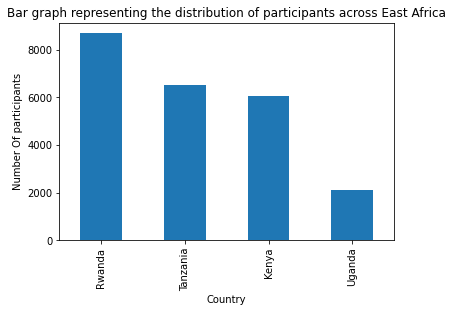

In [237]:
df['country'].value_counts().plot.bar()
plt.xlabel('Country')
plt.ylabel('Number Of participants')
plt.title('Bar graph representing the distribution of participants across East Africa')
plt.show()

Finding out the location that had the highest participants. Where I found out the rural area had the highest number.

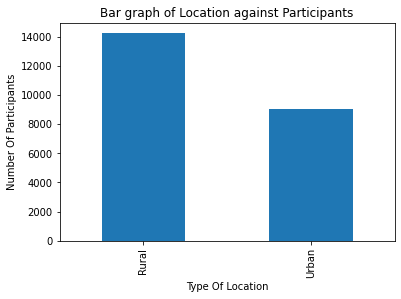

In [196]:
df['type_of_location'].value_counts().plot.bar()
plt.xlabel('Type Of Location')
plt.ylabel('Number Of Participants')
plt.title('Bar graph of Location against Participants')
plt.show()

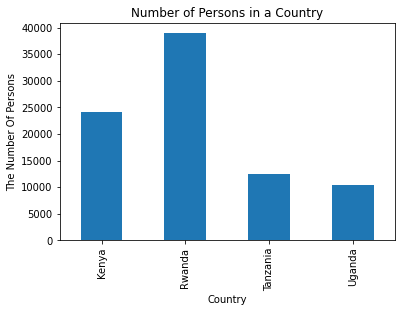

In [195]:
bi=df.groupby(['country'])['household_size'].sum()
bi.plot.bar()
plt.xlabel('Country')
plt.ylabel('The Number Of Persons')
plt.title('Number of Persons in a Country')
plt.show()

Finding out whether household size has an impact on having a bank account. In the graph below shows there is no significant difference.

Text(0.5, 1.0, 'Graph of bank account vs household size')

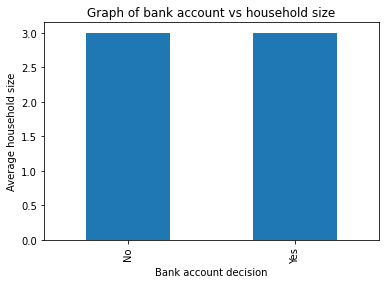

In [235]:
new=df.groupby(['has_a_bank_account'])['household_size'].median()
new.plot.bar()
plt.xlabel('Bank account decision')
plt.ylabel('Average household size')
plt.title('Graph of bank account vs household size')


Finding out the country with the highest number of bank holders. Kenya has the highest number of bank holders while Uganda has the lowest number of bank holders.

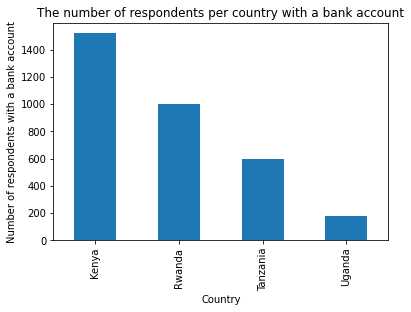

In [220]:
df1=df[df['has_a_bank_account']=='Yes']
df2=df1.groupby(['country'])['has_a_bank_account'].count()
df2.plot.bar()
plt.xlabel('Country')
plt.ylabel('Number of respondents with a bank account')
plt.title('The number of respondents per country with a bank account')
plt.show()

In the graph below we finding out whether the type of location has an effect on whether one has a bank account, which I found out does not affect.

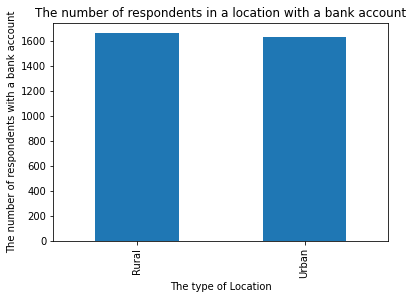

In [222]:
df3=df1.groupby(['type_of_location'])['has_a_bank_account'].count()
df3.plot.bar()
plt.xlabel('The type of Location')
plt.ylabel('The number of respondents with a bank account')
plt.title('The number of respondents in a location with a bank account')
plt.show()

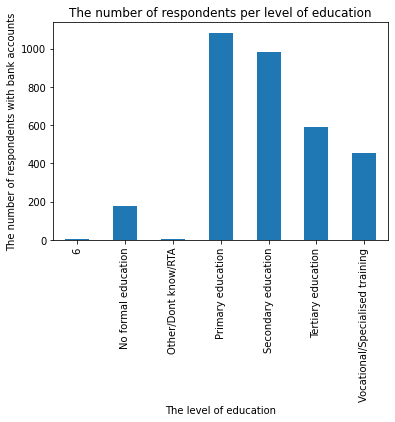

In [223]:
df4=df1.groupby(['level_of_education'])['has_a_bank_account'].count()
df4.plot.bar()
plt.xlabel('The level of education')
plt.ylabel('The number of respondents with bank accounts')
plt.title('The number of respondents per level of education')
plt.show()

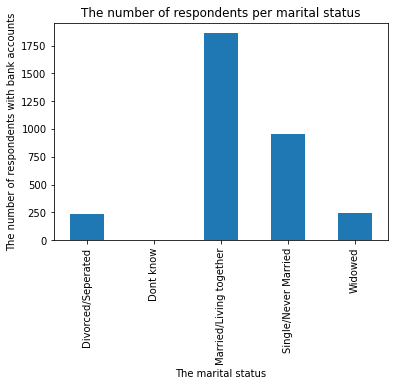

In [233]:
df5=df1.groupby(['marital_status'])['has_a_bank_account'].count()
df5.plot.bar()
plt.xlabel('The marital status')
plt.ylabel('The number of respondents with bank accounts')
plt.title('The number of respondents per marital status')
plt.show()

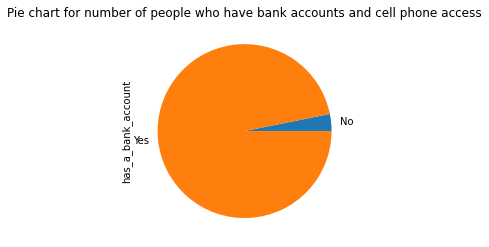

In [238]:
df6=df1.groupby(['cell_phone_access'])['has_a_bank_account'].count()
df6.plot.pie()
plt.title("Pie chart for number of people who have bank accounts and cell phone access")
plt.show()

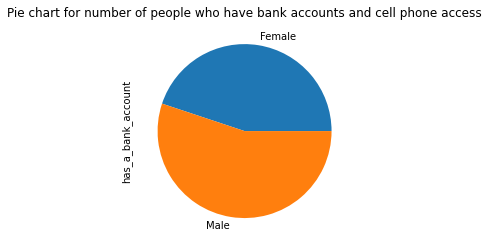

In [242]:
df7=df1.groupby(['gender_of_respondent'])['has_a_bank_account'].count()
df7.plot.pie()
plt.title("Pie chart for number of people who have bank accounts and cell phone access")
plt.show()

# The Bivariate Analysis

In [207]:
!pip install -q researchpy
import researchpy as rp
rp.summary_cont(df.groupby('country')['respondent_age'])

,N,Mean,SD,SE,95% Conf.,Interval
country,,,,,,
Kenya,6064,39.620218,17.215693,0.221078,39.186870,40.053566
Rwanda,8684,39.276601,16.261983,0.174507,38.934547,39.618655
Tanzania,6500,38.482462,16.441895,0.203937,38.082715,38.882208
Uganda,2095,35.496897,15.304233,0.334364,34.841387,36.152407


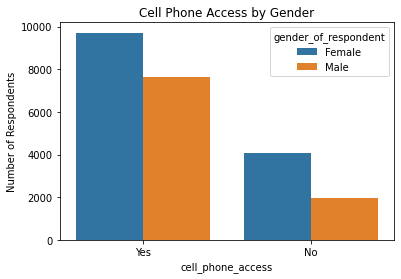

In [244]:
bx=sns.countplot('cell_phone_access', hue='gender_of_respondent', data=df)
bx.set(ylabel='Number of Respondents',title='Cell Phone Access by Gender')
plt.show()

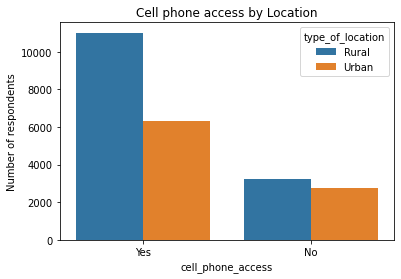

In [246]:
sx=sns.countplot('cell_phone_access', hue='type_of_location', data=df)
sx.set(ylabel='Number of respondents',title='Cell phone access by Location')
plt.show()

# Principal Component Analysis

Here we are labelling the dataset that have two outcomes.

In [ ]:
encode={"Has a Bank account" : {"Yes" : 1, "No": 0},"Type of Location" : {"Rural" : 1, "Urban" : 0},"Cell Phone Access" : {"Yes" : 1, "No" : 0}, "gender_of_respondent" : {"Female" : 1, "Male" : 1}}

In [ ]:
df.replace(encode, inplace=True)
df.head()

Dropping the unnecessary columns.

In [ ]:
df.drop(['country','year','uniqueid','the_relationship_with_head','marital_status','level_of_education','type_of_job'],axis=1,inplace=True)

Defining the variables to work with in our dimension reduction using Principal Component Analysis.

In [22]:
X=df.drop('Has a Bank account',1)
y=df['Has a Bank account']

Splitting the dataset into the test and train and defining the size of the test data which will be 20% of the data.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Importing the Standard Scaler from Sklearn to normalize the distribution of the data into normal distribution.

In [24]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Importing the PCA for our analysis which will only be used in the train data and all the factors will e considered.

In [25]:
from sklearn.decomposition import PCA

pca=PCA()

X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)


Finding out the variance for each principal component of our analysis. In our analysis we find out that the first four components account for 100% of the classification of whether one can pick a bank account or not. The first three components account for 82.9%

In [26]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.33635136, 0.2677647 , 0.22548257, 0.17040137, 0.        ])

We are going to use the first component for our analysis in our prediction model.

In [32]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)

X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

Here we are going to train the model using the Random Forest Classifier to help out in the classification.

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(max_depth=0.2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=0.2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Here we are going to test using the data that was set apart for the test and train to find out the efficiency of the model. 

In [34]:
y_pred=classifier.predict(X_test)

Importing the necessary libraries for measring the accuracy of the model.

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

We find out the first principal Component has an 85% predictive capacity.

In [36]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test,y_pred))

[[4015    0]
 [ 666    0]]
Accuracy 0.8577227088229011


Testing the model for factor analysis.

In [65]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


(nan, nan)

We find our dataset has no capacity for factor analysis with nan KMO value.

In [42]:
#!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model=calculate_kmo(df)
kmo_all, kmo_model

(                      KMO
 Has a Bank account    NaN
 Type of Location      NaN
 Cell Phone Access     NaN
 household_size        NaN
 Respondent Age        NaN
 gender_of_respondent  NaN, nan)

# Linear Discriminant Analysis

I divided the dataset.

In [52]:
x=df.iloc[:,1:6].values
Y=df.iloc[:,0].values

Importing the train_test_split library to split the data into train and test.

In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, Y_train, Y_test=train_test_split(x,Y,test_size=0.2,random_state=0)

Creating a normal distribution of the data.

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Importing the Linear Discriminant Analysis and using the first two components in our analysis.

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda=LDA(n_components=2)
x_train=lda.fit_transform(x_train,Y_train)
x_test=lda.transform(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Using the Random Forest Classifier in our classification model.

In [72]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(max_depth=0.2, random_state=0)
classifier.fit(x_train, Y_train)
Y_pred=classifier.predict(x_test)

Finding out the predictive capacity of our Linear Discriminant model.

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(Y_test,Y_pred)))

[[4015    0]
 [ 666    0]]
Accuracy0.8577227088229011


Defining the metric for success.

1. Which country is likely to have a new bank account holder? A person living in Kenya is more likely to open a new bank account.

2. Which location is likely to have a new bank account holder? There is no much difference of a person living in the rural area and urban area.

3. What Gender is likely to have a new bank account? A male is more likely to open a bank account more than a female. Though there is no much significant difference.

  4.Which marital status is more likely to have a new bank account? A married person is more likely to open a new bank account.

5. What level of education is more likely to have new bank account? A person with primary level education is more likely to open a new bank account.

Our main experimental question will be to find out whether a married female adult living in the rural area, has cell phone access and is married is likely to have a bank account? Given the weighty married,and cell phone access, it is more likely the individual will open a new bank account.

Explorative Data Analysis.

The data was enough for my analysis. The data was right for the survey and four components as proved in the Principal Component Analysis and Linear Discriminant Analysis were enough for the analysis. 